In [1]:
#import latent_calendar
import pandas as pd

In [2]:
#base_df = pd.read_excel("base-data.xlsx")
file_name = "base-data.xlsx"
#exploring_actor_vial_df = pd.read_excel(io=file_name, sheet_name='ACTOR_VIAL')
#exploring_vehiculos_df = pd.read_excel(io=file_name, sheet_name='VEHICULOS')

siniestros_df = pd.read_excel(io=file_name, sheet_name='SINIESTROS')
hipothesis_df = pd.read_excel(io=file_name, sheet_name='HIPOTESIS')

# Combining Dataframes
see: https://datacarpentry.org/python-ecology-lesson/05-merging-data.html

It appears (from looking at the data in excel) that diniestros and hipothesis are the only two datapoints that are 1-1, whereas the others are metadata about each car crash.

In [ ]:
siniestros_df["CODIGO_ACCIDENTE"].nunique()

In [ ]:
hipothesis_df["CODIGO_ACCIDENTE"].nunique()

In [ ]:
common_keys = ['CODIGO_ACCIDENTE','FECHA']

In [ ]:
merged_inner = pd.merge(left=siniestros_df, right=hipothesis_df, left_on=common_keys, right_on=common_keys)

In [ ]:
merged_inner["datetime"] = pd.to_datetime(merged_inner["FECHA"].str.cat(merged_inner["HORA"], sep=" "), format="mixed")

In [ ]:
(
    merged_inner
    .groupby([pd.Grouper(key="datetime", freq="M"), "GRAVEDAD"])
    .size()
    .unstack()
    .iloc[-52 * 2:]
    .assign(ratio=lambda df: df[1] / (df[1]+ df[2] + df[3]))
    .loc[:, 1]
    .plot()
)

In [ ]:
merged_inner["DIRECCION"].value_counts()

In [ ]:
df_location.sum(axis=1).pipe(lambda ser: ser / ser.sum())

In [ ]:
df_location = merged_inner.cal.aggregate_events("DIRECCION", "datetime")

# df_location.cal.normalize("max").cal.sum_over_vocab("hour").T.plot()

In [ ]:
model = LatentCalendar(n_components=10, n_jobs=-1)

df_model = df_location.loc[df_location.sum(axis=1) > 25]
model.fit(df_model)

plot_model_components(model)

In [ ]:
from latent_calendar import LatentCalendar 
from latent_calendar.plot import plot_model_components

In [ ]:
(merged_inner.query("CODIGO_ACCIDENTE == 4401444"))

In [ ]:
(hipothesis_df.query("CODIGO_ACCIDENTE == 4401444"))

# Trying to match them together

We can pre-process hipothesis to have lists of codigo causa instead of multiple row

In [ ]:
hipothesis_df.head(10).groupby("FECHA").agg(lambda x: x.tolist())

In [ ]:
#https://stackoverflow.com/questions/46275765/pandas-merge-row-data-with-multiple-values-to-python-list-for-a-column
#grouped_hipothesis_df = hipothesis_df.groupby(['CODIGO_ACCIDENTE','FECHA']).agg(lambda x: x.tolist())#.apply(lambda x: 12, axis = 1, result_type= "expand")
#grouped_hipothesis_df
def tiny(series, n=4):
    l =  series.tolist()
    while len(l) < n: # n magic number
        l.append(-1)
        
    return l
#hdf = hipothesis_df.query("CODIGO_ACCIDENTE == 10535475").groupby(['CODIGO_ACCIDENTE','FECHA']).agg(tiny)#.apply(lambda x: x + 4, axis = 1, result_type= "expand")
#hdf[['cc1','cc2','cc3','cc4','cc5','cc6','cc7']] = pd.DataFrame(hdf.CODIGO_CAUSA.tolist(), index= hdf.index)
#hdf


In [ ]:
hipothesis_df.groupby("CODIGO_ACCIDENTE").size().sort_values().value_counts(normalize=True)

In [ ]:
grouped_hipothesis_df = hipothesis_df.drop_duplicates().groupby(['CODIGO_ACCIDENTE','FECHA']).agg(tiny)

In [ ]:
grouped_hipothesis_df.query("CODIGO_ACCIDENTE == 4508250")

In [ ]:
for i in grouped_hipothesis_df.CODIGO_CAUSA.tolist():
    if len(i) > 4: 
        print(i)

In [ ]:
grouped_hipothesis_df[['CC1','CC2','CC3','CC4','CC5']] = pd.DataFrame(grouped_hipothesis_df.CODIGO_CAUSA.tolist(), index= grouped_hipothesis_df.index)


In [ ]:
grouped_hipothesis_df.query("CC5 > 0")

In [ ]:
merged_inner = pd.merge(left=siniestros_df, right=grouped_hipothesis_df, left_on=common_keys, right_on=common_keys)

In [ ]:
merged_inner

In [ ]:
grouped_hipothesis_df = hipothesis_df.groupby(['CODIGO_ACCIDENTE','FECHA']).agg(lambda x: x.tolist())


# Using Google Maps

In [ ]:
#WIP HillmerCh
#! pip install geopandas
! pip install geodatasets

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path

In [ ]:
df = pd.DataFrame(
    {
        "City": ["Bogota"],
        "Country": ["Colombia"],
        "Latitude": [4.624335],
        "Longitude": [-74.063644],
    }
)
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

In [ ]:
print(gdf.head())

In [ ]:
geopandas.datasets.available

/tmp/ipykernel_9034/1083294856.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))


<Axes: >

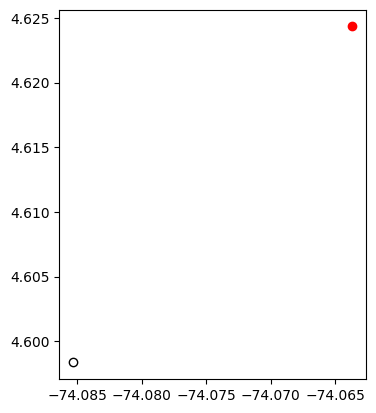

In [3]:
#world = geopandas.read_file(get_path("naturalearth.land"))
#world
#ax = world.clip([-74.204251, 4.485794, -74.017856, 4.781398]).plot(color="white", edgecolor="black")



# We restrict to Bogota.
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

bogota = cities.loc[cities['name'] == 'Bogota'] # get Singapore row
boundaries = cities['geometry'] # get Singapore geometry

ax = bogota.plot(color='white', edgecolor='black')
gdf.plot(ax=ax, color="red")



#world
#ax = world.plot(color='white', edgecolor='black')
#gdf.plot(ax=ax, color="red")

#ax = world[world.name == 'São Paulo'].plot(color='white', edgecolor='black')


# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color="red")

#plt.show()

<Axes: >

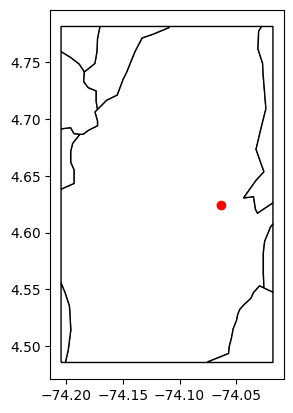

In [4]:
colombia = geopandas.read_file(geodatasets.get_path('geoda.malaria'))
ax = colombia.clip([-74.204251, 4.485794, -74.017856, 4.781398]).plot(color="white", edgecolor="black")

gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))



gdf.plot(ax=ax, color="red")



In [ ]:
! pip install geopy

In [1]:

# https://pypi.org/project/geopy/

#KR 80-CL 2                         293
#CL 13-KR 72                        269
#AV AVENIDA CIUDAD DE CALI-CL 26    264
#AV AVENIDA BOYACA-CL 13            261
#CL 80-KR 72                        256

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path
import geodatasets

from functools import partial

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dm1")


address_vec = ['KR 80-CL 2 51', 'AV AVENIDA BOYACA-CL 80 02', 'AV AVENIDA CIUDAD DE CALI-CL 26 02', 'CL 13-KR 72 02' , 'AV AVENIDA BOYACA-CL 13 02']

df = pd.DataFrame(
    {
        "City": ["Bogota"],
        "Country": ["Colombia"],
        "Latitude": [4.624335],
        "Longitude": [-74.063644],
    }
)
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

location_df = pd.DataFrame({"a": [1, 2],
                         "b": [5, 6]})


location_arr = []

for address in address_vec:
    adr_city = address + " Bogota"
    location = geolocator.geocode(adr_city)
    #print(adr_city)
    #print(location)
    if location!=None:
        print((location.latitude, location.longitude))
        location_arr.append ([location.latitude, location.longitude])


#location_df = pd.DataFrame(location_arr, columns=['Address', 'Latitude', 'Longitude'])
location_arr
location_df = pd.DataFrame(location_arr, columns=['Latitude', 'Longitude'])
location_df


gdf = geopandas.GeoDataFrame(
    location_df, geometry=geopandas.points_from_xy(location_df.Longitude, location_df.Latitude), crs="EPSG:4326"
)




colombia = geopandas.read_file(geodatasets.get_path('geoda.malaria'))
ax = colombia.clip([-74.204251, 4.485794, -74.017856, 4.781398]).plot(color="white", edgecolor="black")



gdf.plot(ax=ax, color="red")






(4.5724241, -74.1392702)


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=AV+AVENIDA+CIUDAD+DE+CALI-CL+26+02+Bogota&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [ ]:
#https://geopandas.org/en/stable/docs/user_guide/data_structures.html

from geopy.geocoders import Bing

location_arr = []

for address in address_vec:
    adr_city = address + " Bogota"
    location = geolocator.geocode(adr_city, addressdetails = True)
    #print(adr_city)
    #print(location)
    if location!=None:
        print(adr_city)
        print(location.raw)
        print((location.latitude, location.longitude))
        location_arr.append ([location.latitude, location.longitude])

#4.5724435,-74.1394699

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path
import geodatasets

from functools import partial

from geopy.geocoders import Bing
geolocator = Bing(api_key=os.environ['BING_KEY'])

address_vec = ['KR 80-CL 2 51', 'AV AVENIDA BOYACA-CL 80 02', 'AV AVENIDA CIUDAD DE CALI-CL 26 02', 'CL 13-KR 72 02' , 'AV AVENIDA BOYACA-CL 13 02']

location_arr = []

for address in address_vec:
    adr_city = address + " Bogota"
    location = geolocator.geocode(adr_city)
    #print(adr_city)
    #print(location)
    if location!=None:
        print((location.latitude, location.longitude))
        location_arr.append ([location.latitude, location.longitude])


#location_df = pd.DataFrame(location_arr, columns=['Address', 'Latitude', 'Longitude'])
location_arr
location_df = pd.DataFrame(location_arr, columns=['Latitude', 'Longitude'])
location_df


gdf = geopandas.GeoDataFrame(
    location_df, geometry=geopandas.points_from_xy(location_df.Longitude, location_df.Latitude), crs="EPSG:4326"
)




colombia = geopandas.read_file(geodatasets.get_path('geoda.malaria'))
ax = colombia.clip([-74.204251, 4.485794, -74.017856, 4.781398]).plot(color="white", edgecolor="black")



gdf.plot(ax=ax, color="red")

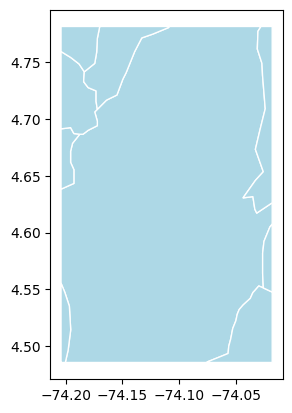

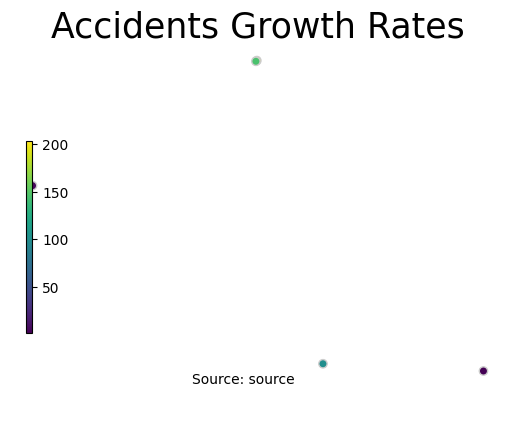

In [12]:
# https://www.relataly.com/visualize-covid-19-data-on-a-geographic-heat-maps/291/#google_vignette

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path
import geodatasets

location_df_static = pd.DataFrame(
    {
        "Latitude": [4.6020512, 4.66225405, 4.6374221, 4.600612, 4.6621156 ],
        "Longitude": [-74.10186975,  -74.1150004, -74.1595407, -74.06999825, -74.1151858],
        "Accidents": [100, 203, 5, 1, 145],

    }
)

title = 'Accidents Growth Rates'
col = 'Accidents'
source = 'Source: source'
vmin = location_df_static[col].min()
vmax = location_df_static[col].max()


cmap = 'viridis'

gdf_static = geopandas.GeoDataFrame(
    location_df_static, geometry=geopandas.points_from_xy(location_df_static.Longitude, location_df_static.Latitude)
)


geo_df = geopandas.read_file(geodatasets.get_path('geoda.malaria'))
#ax = geo_df.clip([-74.204251, 4.485794, -74.017856, 4.781398]).plot( figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')
ax = geo_df.clip([-74.204251, 4.485794, -74.017856, 4.781398]).plot( edgecolor='white', linewidth=1, color='lightblue')


# Print the map
#geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')


# Create figure and axes for Matplotlib
fig, ax = plt.subplots()
#ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
gdf_static.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
# Create an annotation for the data source
ax.annotate(source, xy=(0.3, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=10)
 

            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)



Getting places with the most accidents


In [4]:
# create dfs out of 2019 data

def make_date(df):
    df["datetime"] = pd.to_datetime(df["FECHA"], format="mixed")
    
def make_datetime(df):
    df["datetime"] = pd.to_datetime(df["FECHA"].str.cat(df["HORA"], sep=" "), format="mixed")

    
def clean_direccion(data):
     return " ".join(data.split()[:-1])
    
siniestros_df['DIRECCION_BASE'] = siniestros_df['DIRECCION'].apply(clean_direccion)
make_datetime(siniestros_df)

siniestros_2019 = siniestros_df.loc[siniestros_df["datetime"].between("2019-01-01","2020-01-01")]

In [6]:
siniestros_2019
siniestros_2019.DIRECCION_BASE.describe()

count           34991
unique          18399
top       CL 13-KR 72
freq               58
Name: DIRECCION_BASE, dtype: object

In [7]:
siniestros_2019["DIRECCION_BASE"].value_counts()

DIRECCION_BASE
CL 13-KR 72                         58
AV AVENIDA BOYACA-CL 13             48
AV AVENIDA BOYACA-CL 26             45
KR 80-CL 2                          44
AV AVENIDA DE LAS AMERICAS-KR 68    42
                                    ..
KR 86-CL 33                          1
KR 103A-CL 21                        1
KR 86D-CL 42F S                      1
KR 94-CL 63 S                        1
CL 96A-KR 14Q S                      1
Name: count, Length: 18399, dtype: int64

In [31]:
n = 326 #325 More than 10 2019
#siniestros_2019.DIRECCION_BASE.value_counts()[:n].index.tolist()
siniestros_2019.DIRECCION_BASE.value_counts()[:n]

DIRECCION_BASE
CL 13-KR 72                         58
AV AVENIDA BOYACA-CL 13             48
AV AVENIDA BOYACA-CL 26             45
KR 80-CL 2                          44
AV AVENIDA DE LAS AMERICAS-KR 68    42
                                    ..
CL 26-KR 103                        10
AV AVENIDA CIUDAD DE CALI-CL 90     10
AV AVENIDA CIUDAD DE CALI-CL 51     10
AV AVENIDA DE LAS AMERICAS-KR 62    10
AC 13-KR 72                          9
Name: count, Length: 326, dtype: int64

In [68]:
n = 313 # More equal than 50 all ds
#siniestros_2019.DIRECCION_BASE.value_counts()[:n].index.tolist()
siniestros_df.DIRECCION_BASE.value_counts()[:n]
#AV AVENIDA CIUDAD DE CALI-CL 19

DIRECCION_BASE
KR 80-CL 2                 246
CL 13-KR 72                240
AV AVENIDA BOYACA-CL 13    230
AV AVENIDA BOYACA-CL 80    220
CL 80-KR 72                218
                          ... 
CL 17A-KR 102                1
CL 129-KR 118                1
TR 18NBISA-CL 69D S          1
KR 100-CL 24G                1
CL 142 - KR 146              1
Name: count, Length: 57808, dtype: int64

In [69]:
file_name = 'accidents-by-address.csv'
siniestros_df.DIRECCION_BASE.value_counts().to_csv(file_name, sep='\t')